# Rheology. A very brief Introduction
## by **Robert Castilla**
## CATMEch - Dpt. of Fluid Mechanics
## Universitat Politècnica de Catalunya

## 1. Classification of fluids

This notebook is based principally on the [book by Irgens](https://discovery.upc.edu/iii/encore/record/C__Rb1500935?lang=cat) and also on the classical [book by Bird](https://discovery.upc.edu/iii/encore/record/C__Rb1230696?lang=cat). Also chapter chapter 7 in the book of [Engineerign Fluid Mechanics, by H. Yamaguchi](https://discovery.upc.edu/iii/encore/record/C__Rb1451450?lang=cat) has been used.

Very briefly, when we have studied Fluid Mechanics, we have focused on fluids that meet Newton's law for shear stress,

$$ \tau = \mu \dot\gamma $$

for 2-D flow, where $\tau$ is the shear stres, $\dot\gamma$ is the shear rate. $\mu$ is the _dynamic viscosity_, or just _viscosity_, of the fluid.

Water, air and other molecularly simple fluids obey this law. But most of the liquids do not. [Rheology](https://en.wikipedia.org/wiki/Rheology) is the branch of science and technology that studies this kind of non-linear behaviour, both in solids and in fluids. We are focusing in this part in the rheology of fluids.

A fluid is called _pure viscous_ if the shear rate is only function of shear stress

$$ \tau = f(\dot\gamma) $$

This function can be linear in the case of **Newtonian fluids** or non-linear in the case of **non Newtonian fluids** (also known as rheological fluids). 

In general, for pure viscous fluids, an _apparent viscosity_ can be defined as

$$ \mu (\dot\gamma) = \frac{\tau}{\dot\gamma} $$

The most common model is the **Generalized Newtonian Fluids**, that is modeled with the [**power law**](https://en.wikipedia.org/wiki/Power-law_fluid), also known as Ostwald-de Waele law, where shear stress is modelled as

$$ \tau = K \dot\gamma^n $$

so 

$$ \mu(\dot\gamma) = K (\dot\gamma)^{n-1} $$

$K$ is the _consistency parameter_ and $n$ is the power law index

* When $n = 1$ the fluid is Newtonian and $K$ is just its viscosity
* When $n < 1$ apparent viscosity decreases with shear rate and the fluid is classified as _pseudoplastic_ or [_shear thinning_](https://en.wikipedia.org/wiki/Shear_thinning). Most non-Newtonian fluids are of this type, like paints, [blood](http://www.maths.gla.ac.uk/~xl/Arasu-biofluid.pdf), and most of food liquids (juices, creams, soups,...)
* When $n > 1$ apparent viscosity increases with shear rate and the fluid is known as dilatant or [_shear thickening_](https://en.wikipedia.org/wiki/Dilatant#Examples). This is much less common, and the typical example is the cornstarch (maicena) which allow [funny experiments](https://www.youtube.com/watch?v=q-DZ0f0_NCA)

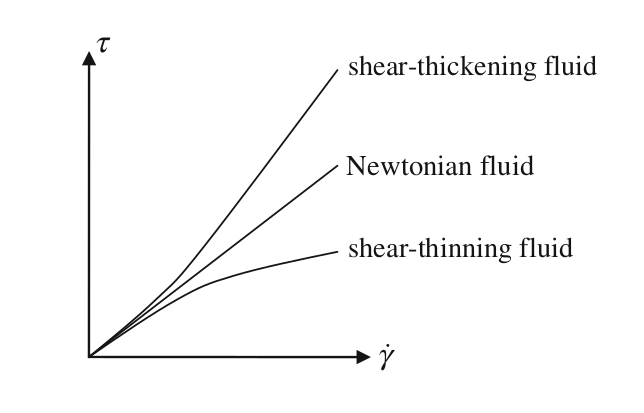

Other type of behavior is the [**viscoplastic fluid**](https://en.wikipedia.org/wiki/Viscoplasticity) that behave as solid for a shesr stress lower than a limit value, known as _yield shear stress_, and as a fluid fow larger values of the shear stress.

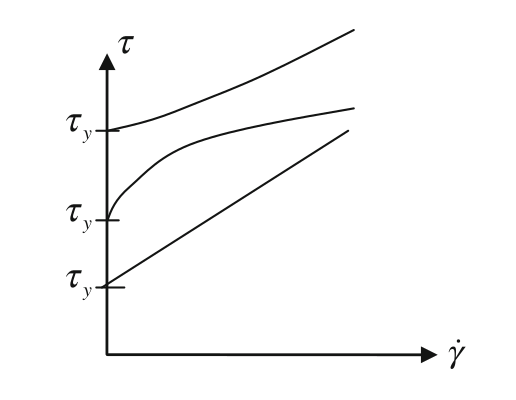

The most simple model is the [_Bingham fluid_](https://en.wikipedia.org/wiki/Bingham_plastic) ([Bingham](https://en.wikipedia.org/wiki/Eugene_C._Bingham) was the inventor of the name "Rheology"). Theses fluids behave like newtonian for shear stress larger than the yield shear stress. This model is tipycally used for toothpaste, mud or slurries. It is mathematically modeled as 

$$ \tau(\dot\gamma) = \tau_y + \mu \tau $$

There are also some **Time Dependent** models as [_Thixotropic fluids_](https://en.wikipedia.org/wiki/Thixotropy) when shear stress decreases in time for a constant shear rate, and [_Rheopectic fluids_] otherwise. These kimd of fluids are beyond the scope of this course




## 2. Generalized Newtonian Fluids

### Power Law Fluid in a pipe

Let's consider a very slow flow and/or very small, so that inertial and time terms can be neglected.

We have seen in Fluid Mechanics that for a Newtonian Fluid, [Hagen-Poiseuille law](https://en.wikipedia.org/wiki/Hagen%E2%80%93Poiseuille_equation#Derivation) holds, according to the Navier Stokes equation for a laminar, viscous flow

\begin{equation}
0 =  -\frac{\partial p}{\partial z} + \frac{1}{r}\frac{\partial}{\partial r}\left(r \tau_{rz}\right)
\end{equation}

giving a paraboloid velocity profile and a flowrate

$$ Q = \frac{\Delta p \pi R^4}{8\mu L} $$

provided that, as a Newtonian fluid, $\tau_{rz} = \mu \dot\gamma = \mu \frac{\partial u_z}{\partial r} $.

Now, with a Power Law Fluid, $\tau_{rz} = K(\dot\gamma)^n$, it leads to 

$$ \frac{\text{d} u_z}{\text{d}r} = \left[ \frac{1}{2K}\left(\frac{\text{d}p}{\text{d}z}\right)r\right]^\frac{1}{n} = \left[ \frac{1}{2K}\left(-\frac{\Delta p}{L}\right)r\right]^\frac{1}{n}$$

In [28]:
from IPython.display import display, Markdown
import numpy as np
import sympy as sp
sp.init_printing()

In [2]:
K,Deltap,L,r,n,R = sp.symbols('K {\Delta}p L r n R',positive=True)
uz = sp.Function('uz')

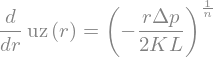

In [3]:
Eq = sp.Eq(uz(r).diff(r),(1/(2*K)*(-Deltap/L)*r)**(1/n))
display(Eq)

First, we integrate it and try to simplify it a little bit ...

In [4]:
exp = (1/(2*K)*(-Deltap/L)*r)**(1/n)

In [5]:
uz = sp.integrate(exp,(r,r,R)).simplify()

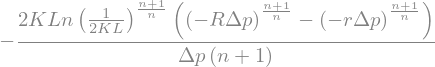

In [6]:
uz.simplify()

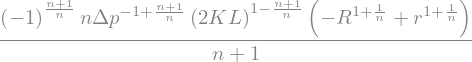

In [7]:
uz = uz.factor(deep=True).powsimp()
display(uz)

... just to integrate it again and obtain the flow rate in the pipe.

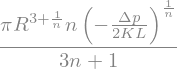

In [27]:
Q = 2*sp.pi*sp.integrate(uz*r,(r,0,R)).simplify().powsimp()
display(Q)

In [30]:
Q = Q.simplify()
display(Markdown(r'$$ Q ='+sp.latex(Q)+'$$'))

$$ Q =\frac{\pi R^{\frac{3 n + 1}{n}} n \left(- \frac{{\Delta}p}{2 K L}\right)^{\frac{1}{n}}}{3 n + 1}$$

and, from her, the average velocity, so that we can normalize velocity profile

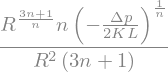

In [31]:
u_avg = Q/(sp.pi*R**2)
display(u_avg)

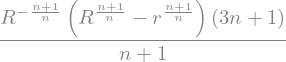

In [32]:
u_dimless = uz/u_avg
u_dimless = u_dimless.simplify()
display(u_dimless)

In order to get it in dimensionless form, we just impose $R=1$ so that now $r$ is the dimensionless radius $0<r/R<1$

In [33]:
u_dimless = u_dimless.subs(R,1)
display(Markdown(r'$$u^* = '+sp.latex(u_dimless)+'$$'))

$$u^* = \frac{\left(1 - r^{\frac{n + 1}{n}}\right) \left(3 n + 1\right)}{n + 1}$$

#### Plot of the velocity profile

We are now plotting this dimensionless profile in order to see the effect of the parameter $n$.

First we _lambdify_ the expression (that is, remember, to convert it to a numerical function of two variables in this case)

In [34]:
u_np = sp.lambdify((n,r),u_dimless)

In [60]:
u_np(1,0.25) # Just to check it

Now the [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/) module is used. It is very useful to make interactive widgets.

In [37]:
from ipywidgets import interactive
import matplotlib.pyplot as plt

In [55]:
def f(n):
    plt.figure(1,frameon=False)
    x = np.linspace(-1, 1, num=500)
    plt.xlim(-1, 1)
    plt.ylim(0,3)
    plt.plot(x,u_np(n,np.abs(x)),linewidth=4)
    plt.plot(x,u_np(1,np.abs(x)),'--',label=r'$n=1$')
    plt.legend()
    plt.show()

interactive_plot = interactive(f, n=(0.01, 2,0.01))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='n', max=2.0, min=0.01, step=0.01), Output(layout=Lay…

***
#### Exercise
Check that dimensionless flowrate is independent of $n$. What is its value?
***

***
#### Exercise
Reynolds number for power law fluids is defined differently than for a Newtonian fluid. Provided that the dimensionless stress $\tau^*$ should be written in terms of a dimensionless strain rate $\gamma^*$ as 
$$ \tau^* = \frac{1}{\text{Re}_n}\left(\gamma^*\right)^n $$
find the definition of $\text{Re}_n$

This number defines the similarity when experiments with two different power law fluids are performed.
***

---
### Assignment A

As assignment for this topic, I propose to make a similar study: the laminar flow in a pipe, for a Bingham plastic 

---

---

### Assignmant B

It is a sample of rheological behaviour of some cosmetic creams, taken from [here](https://www.rheologylab.com/articles/emulsion-stability/)

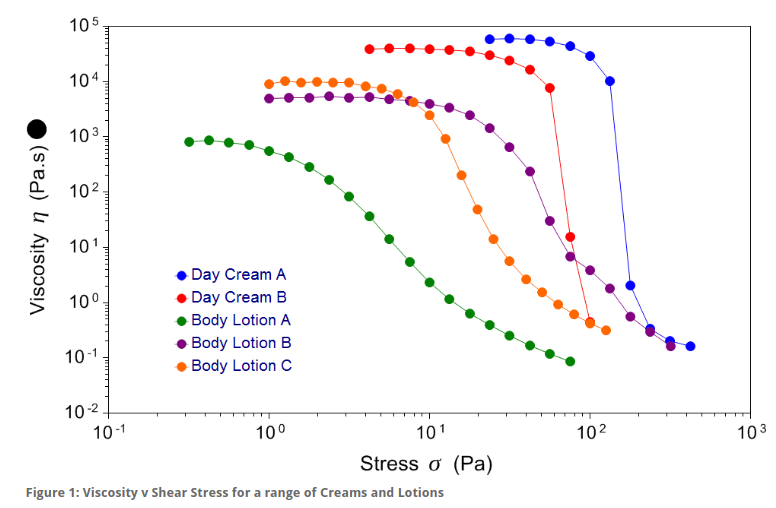

What conclusions would you get from that about the behaviour of day creams in fron of body creams? 

Let's consider the case of the body lotion C. Fit the Power Law model, get coefficients and plot it. You will see that it is not good. You will see that it does not agree with very low (_zero-shear rate viscosity_) or high (_infinity-shear rate viscosity_) shear stress. There are some other models that deals with this behaviour. The molt usual is the [Carreau model](https://en.wikipedia.org/wiki/Carreau_fluid). Apply this law to obtain a more accurate model of this fluid and discuss it.

---